In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import yfinance as yf

In [3]:
start = '2020-01-01'
end = '2024-12-31'
stock ='TATAMOTORS.NS'
data = yf.download(stock,start,end)

C:\Users\kusar\AppData\Local\Temp\ipykernel_26472\1436066502.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2020-01-01,181.748581,183.965628,180.911039,182.438326,25968357
1,2020-01-02,190.912384,191.848468,181.896399,182.290534,57289863
2,2020-01-03,188.301193,192.784543,186.478282,190.074819,47572728
3,2020-01-06,182.931000,188.202651,182.339796,188.202651,28621212
4,2020-01-07,181.994904,186.626065,179.630060,184.261221,34995035
...,...,...,...,...,...,...
1232,2024-12-23,716.043579,728.139592,711.581940,727.445547,9653868
1233,2024-12-24,729.825073,738.946660,716.341031,717.332506,12553555
1234,2024-12-26,734.484985,741.425313,729.279739,729.825039,9343210


In [6]:
moving_avg_100_days = data.Close.rolling(100).mean()

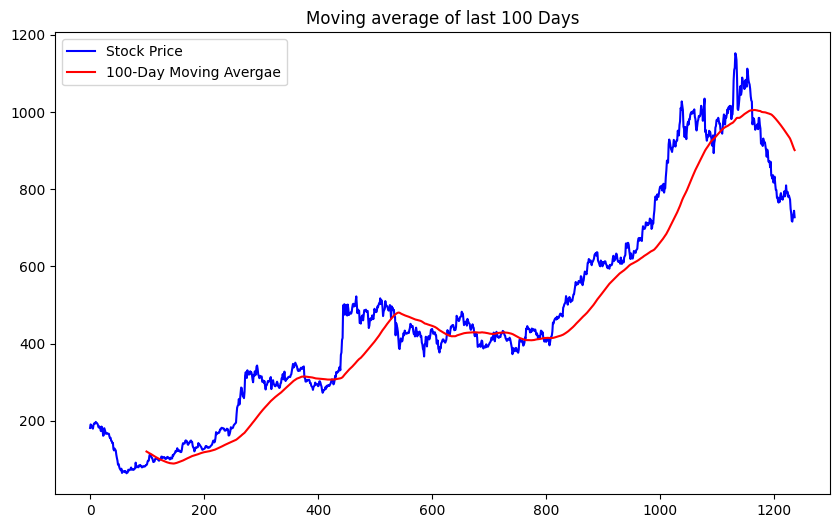

In [7]:
plt.figure(figsize=(10, 6))
plt.title("Moving average of last 100 Days")
plt.plot(data.Close,'b', label='Stock Price')
plt.plot(moving_avg_100_days,'r', label='100-Day Moving Avergae')
plt.legend()
plt.show()

In [8]:
moving_avg_200_days = data.Close.rolling(200).mean()


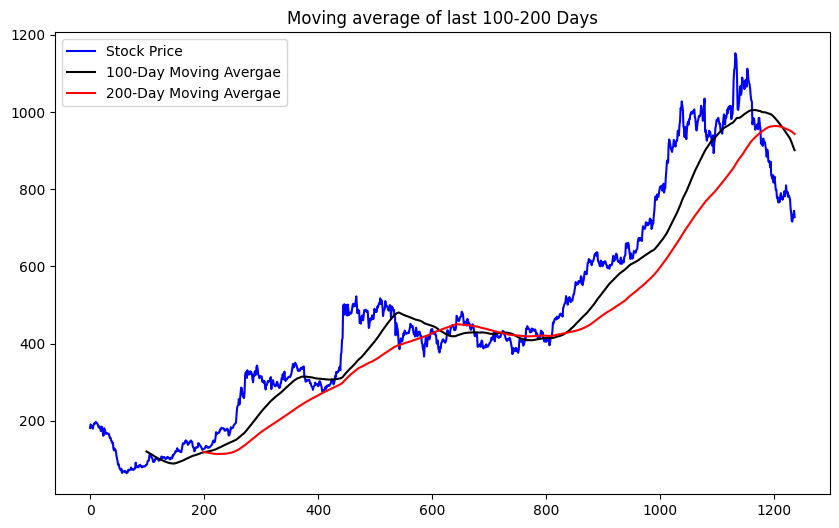

In [9]:
plt.figure(figsize=(10, 6))
plt.title("Moving average of last 100-200 Days")
plt.plot(data.Close,'b', label='Stock Price')
plt.plot(moving_avg_100_days,'black', label='100-Day Moving Avergae')
plt.plot(moving_avg_200_days,'r', label='200-Day Moving Avergae')
plt.legend()
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [12]:
data_train.shape[0]

989

In [13]:
data_test.shape[0]

248

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [18]:
x,y = np.array(x),np.array(y)

In [19]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\kusar\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y,epochs = 20,batch_size=32,verbose=1)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.1691
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0204
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0146
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0105
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0094
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0091
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0099
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0094
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0072
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0076
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0079
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0086
Epoch 13/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0079
Epoch 14/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0069
Epoch 15/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0076
Epoc

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
past_100_days = data_train.tail(100)


In [24]:
data_test = pd.concat([past_100_days,data_test],ignore_index=True)

In [25]:
data_test_scale = scaler.fit_transform(data_test)

In [26]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

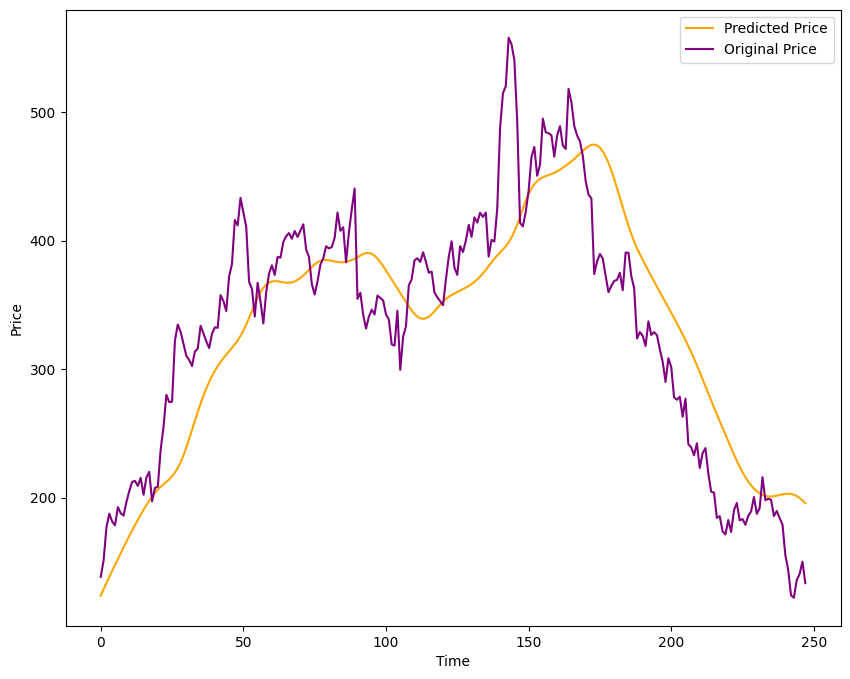

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'orange', label = 'Predicted Price')
plt.plot(y,'purple',label= 'Original Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [32]:
model.save('Stock_Prediction_Model.keras')